In [11]:
from google.colab import files

uploaded = files.upload()

Saving crop_production.csv to crop_production.csv


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('crop_production.csv')


print(data)





                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arec

In [29]:
data.columns = data.columns.str.strip()  # removes spaces before/after names
print(data.columns.tolist())


['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']


In [36]:
import pandas as pd
yearly_production = data.groupby("Crop_Year")["Production"].sum().reset_index()


wet_years = yearly_production.nlargest(5, "Production")

dry_years = yearly_production.nsmallest(5, "Production")

print("Top 5 years with highest total production:")
display(wet_years)

print("\nTop 5 years with lowest total production:")
display(dry_years)


max_season = data.groupby("Season")["Production"].max().sort_values(ascending=False)
print("\nHighest production recorded per season:")
display(max_season)


Top 5 years with highest total production:


,Crop_Year,Production
14,2011,1.430890e+10
16,2013,1.290359e+10
9,2006,8.681913e+09
17,2014,8.664541e+09
7,2004,8.189462e+09



Top 5 years with lowest total production:


,Crop_Year,Production
18,2015,6.935065e+06
0,1997,8.512329e+08
1,1998,5.825321e+09
13,2010,6.307609e+09
2,1999,6.434666e+09



Highest production recorded per season:


,Production
Season,
Whole Year,1.250800e+09
Kharif,1.775796e+07
Rabi,7.556300e+06
Winter,1.841788e+06
Summer,8.822890e+05
Autumn,5.426920e+05


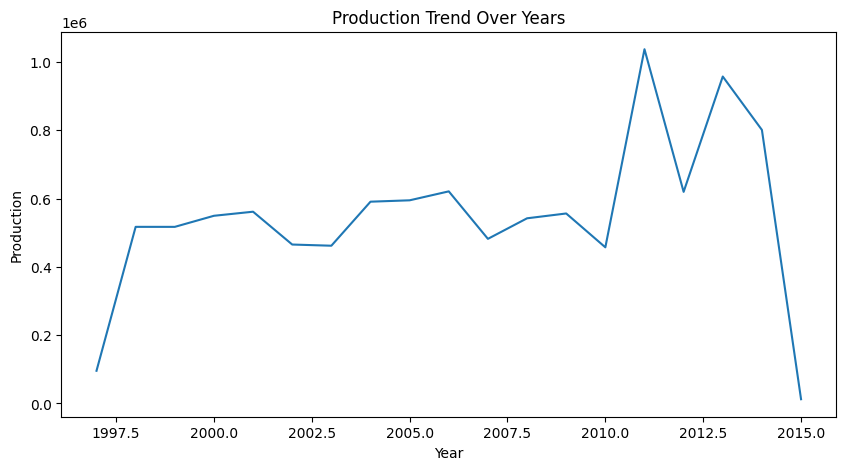

In [32]:


plt.figure(figsize=(10,5))
sns.lineplot(data=data, x="Crop_Year", y="Production", errorbar=None)
plt.title("Production Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()



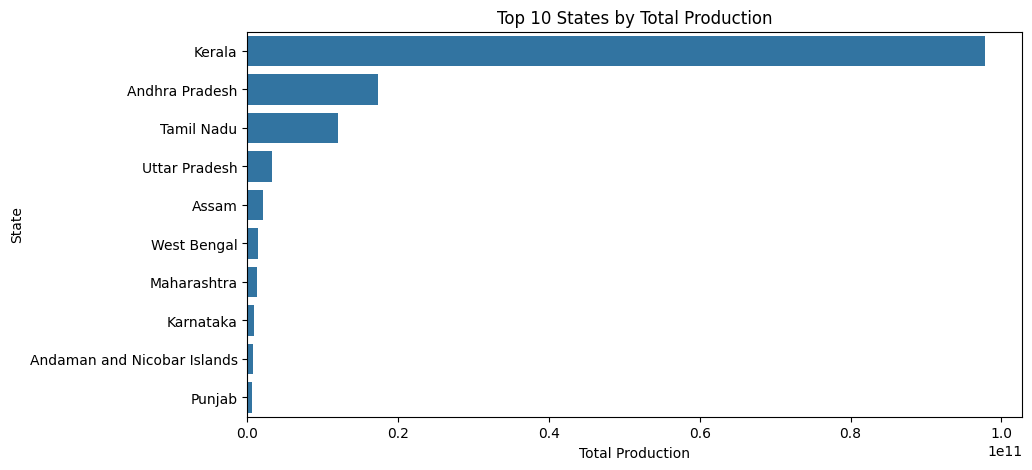

In [34]:
top_states = data.groupby("State_Name")["Production"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Total Production")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.show()


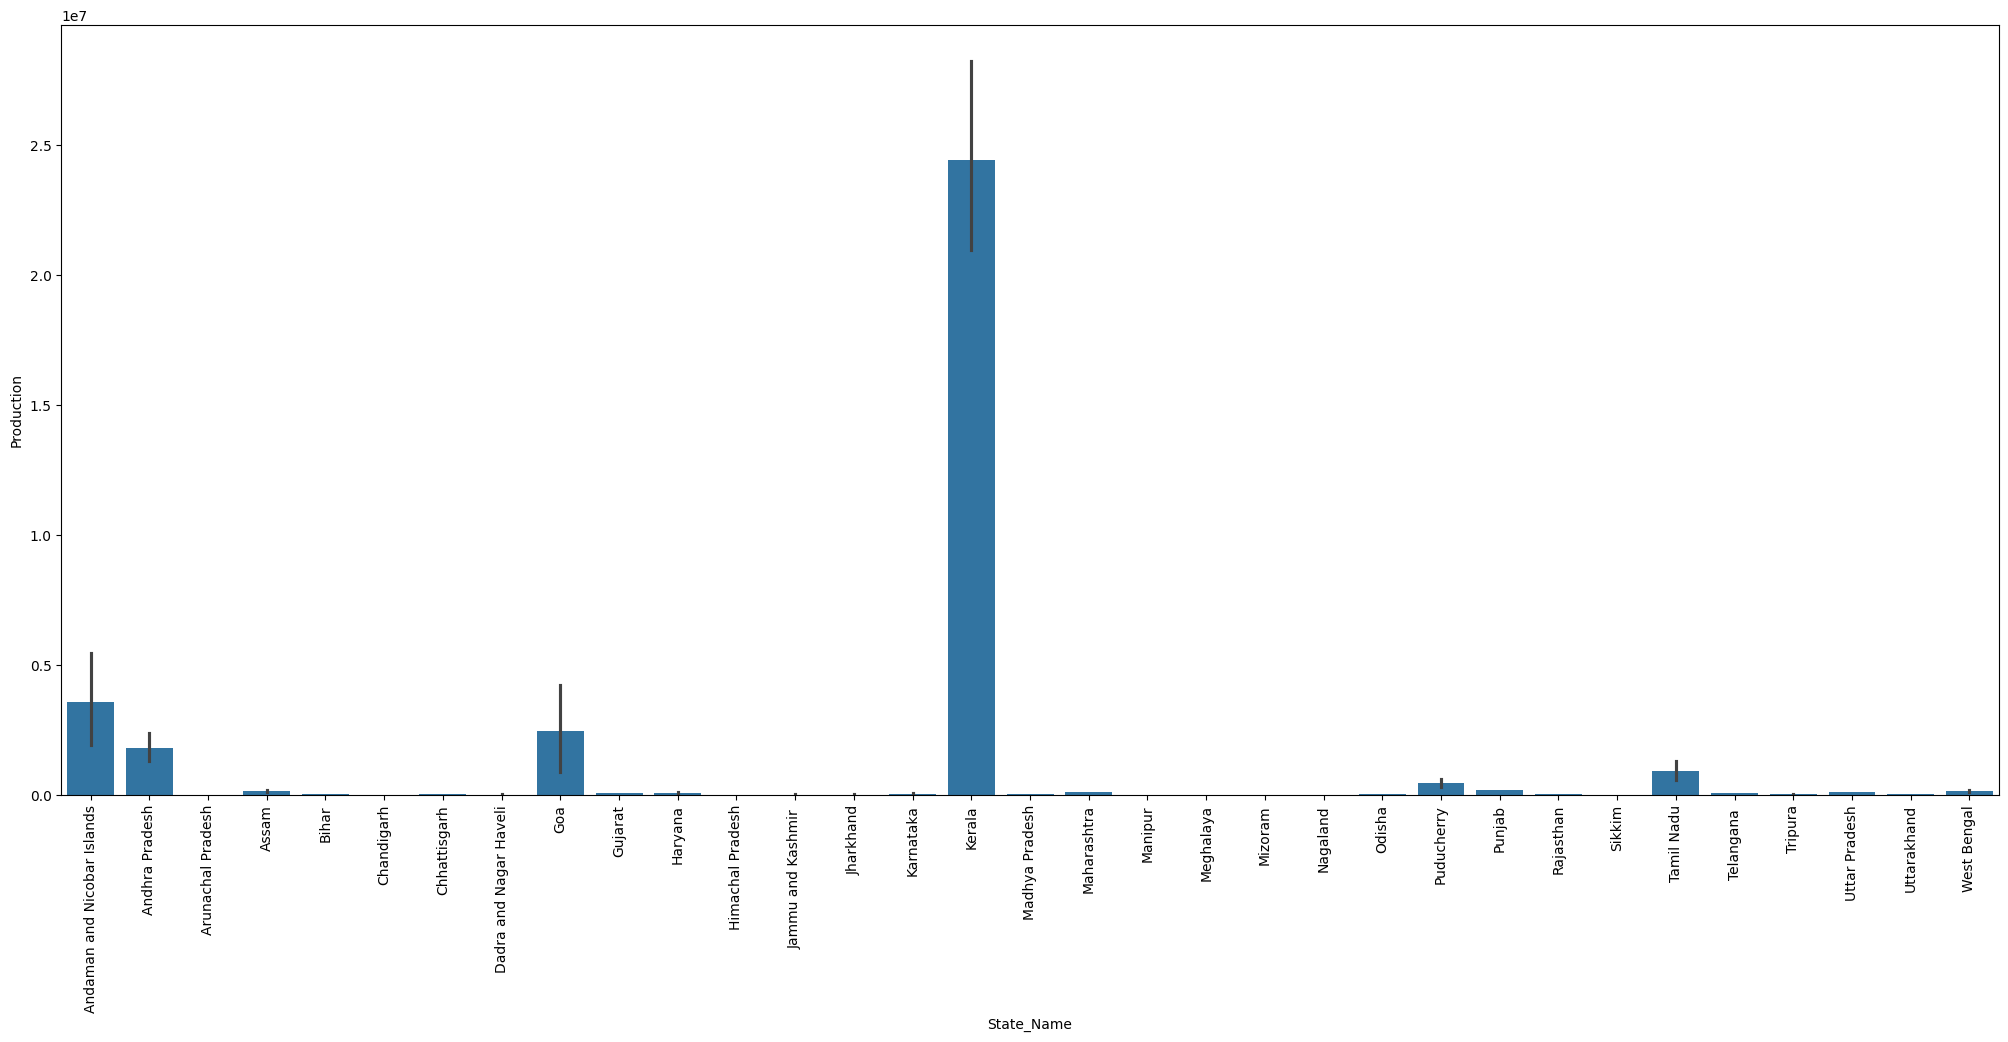

In [37]:
plt.figure(figsize=(25,10))
sns.barplot(x="State_Name", y="Production", data=data)
plt.xticks(rotation=90)
plt.show()

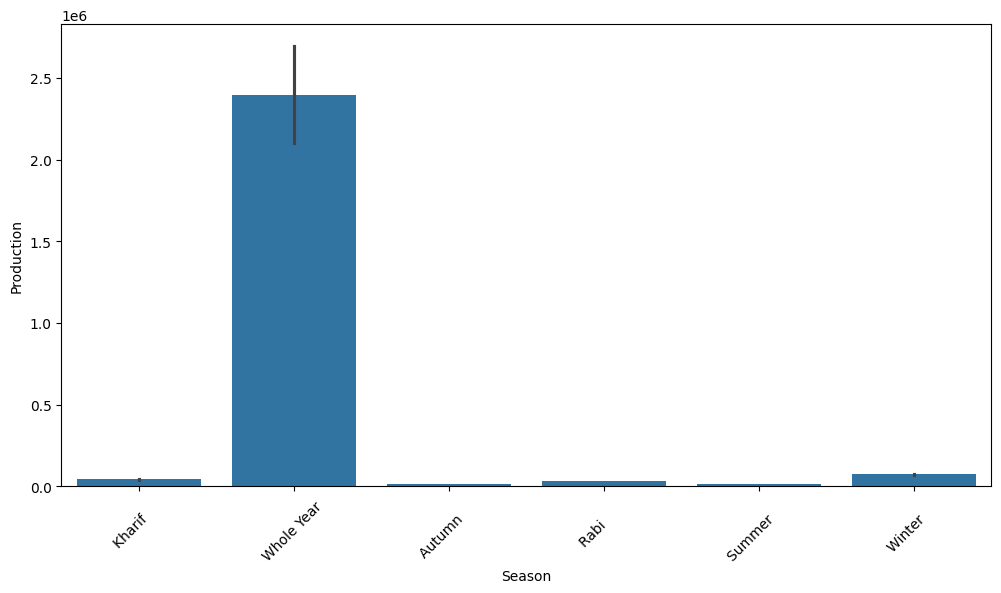

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x="Season", y="Production", data=data)
plt.xticks(rotation=45)
plt.show()

In [39]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

/tmp/ipython-input-848589707.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  data.groupby("Season",axis=0).agg({"Production":np.sum})
/tmp/ipython-input-848589707.py:1: FutureWarning: The provided callable <function sum at 0x78b111b27100> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby("Season",axis=0).agg({"Production":np.sum})


,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [40]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


In [41]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15104, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84


<Axes: xlabel='Season', ylabel='Production'>

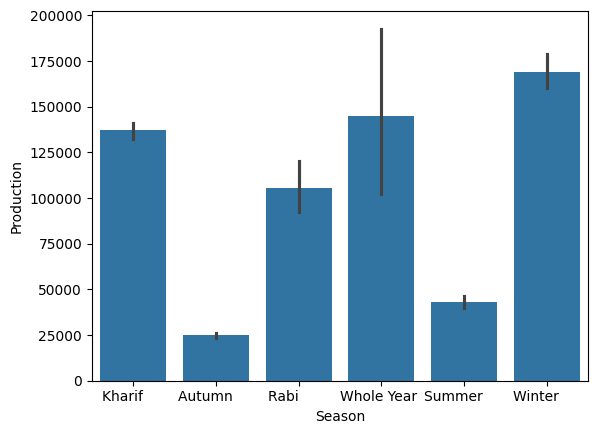

In [43]:
sns.barplot(x="Season", y="Production", data=rice_df)

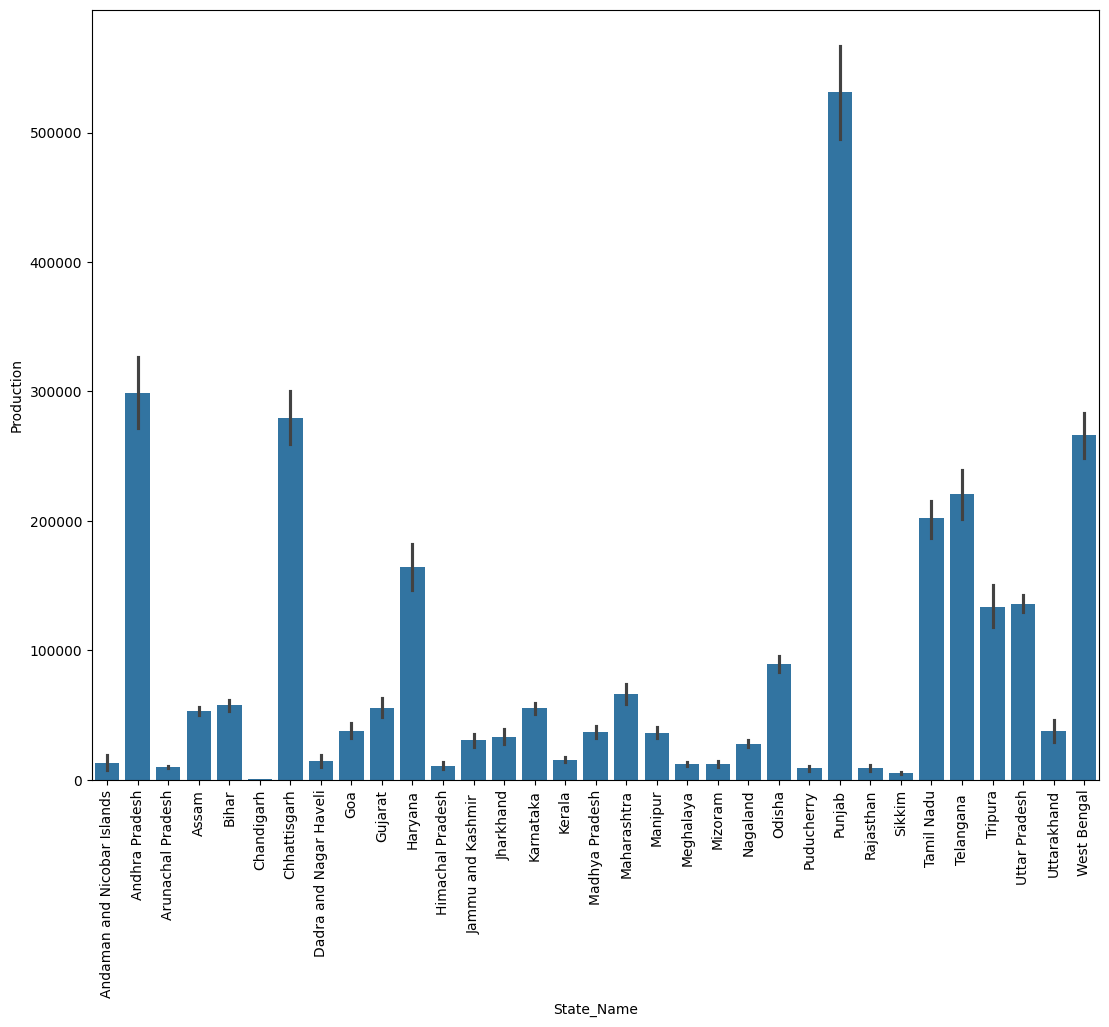

In [44]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name", y="Production", data=rice_df)
plt.xticks(rotation=90)
plt.show()

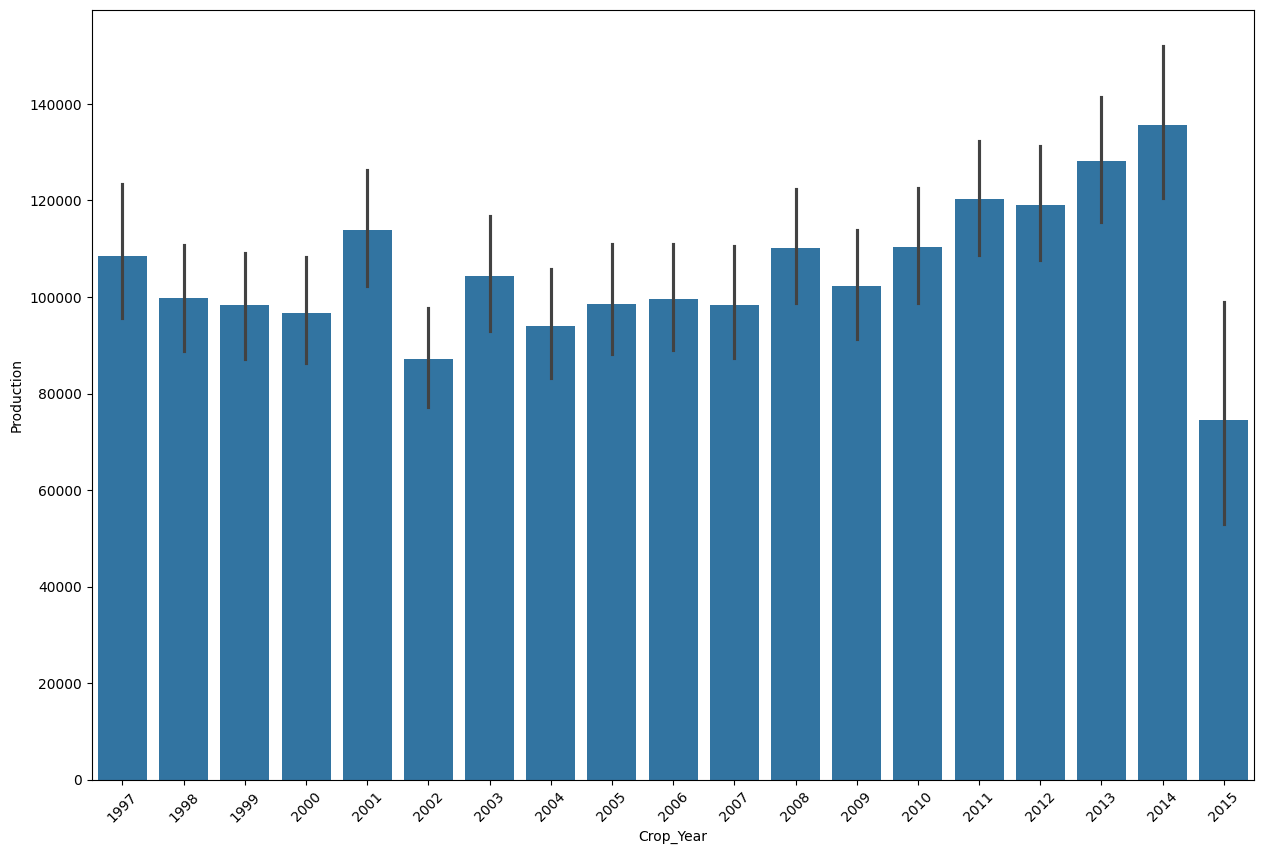

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year", y="Production", data=rice_df)
plt.xticks(rotation=45)
plt.show()

Correlation Matrix:


,Area,Production
Area,1.000000,0.040587
Production,0.040587,1.000000


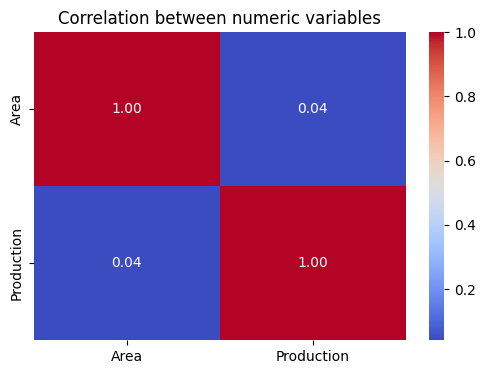

In [50]:
numeric_cols = ["Area", "Production"]


correlation = data[numeric_cols].corr()
print("Correlation Matrix:")
display(correlation)

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numeric variables")
plt.show()


Covariance Matrix:


,Area,Production
Area,2.552614e+09,3.522683e+10
Production,3.522683e+10,2.912420e+14


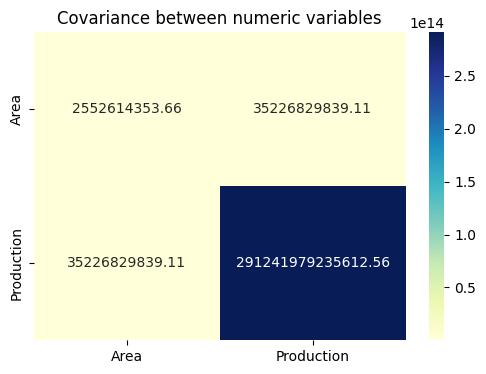

In [51]:
covariance = data[numeric_cols].cov()
print("\nCovariance Matrix:")
display(covariance)

plt.figure(figsize=(6,4))
sns.heatmap(covariance, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Covariance between numeric variables")
plt.show()

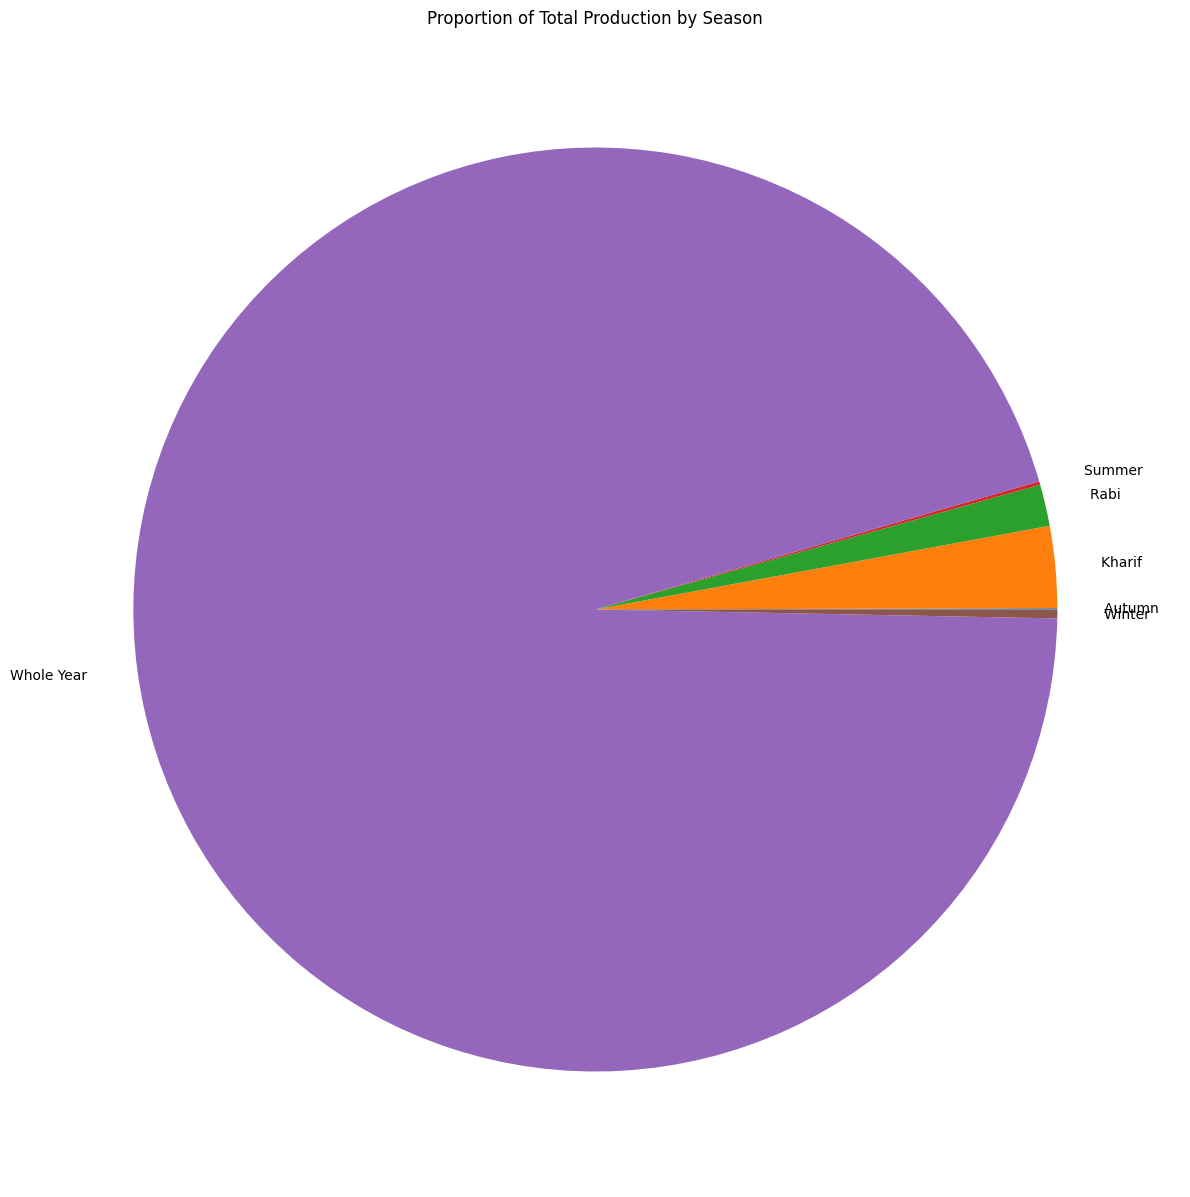

In [57]:
import matplotlib.pyplot as plt


season_prod = data.groupby("Season")["Production"].sum()


plt.figure(figsize=(15,15))
plt.pie(
    season_prod,
    labels=season_prod.index,


)
plt.title("Proportion of Total Production by Season")
plt.show()
